## Practical Work 2

For this practical work, the trainees will have to develop a Python program that is able to implement the gradient descent variants (Batch/Mini-Batch/Stochastic) in order to achieve the linear regression of a set of datapoints.
##### Please notice that we will apply these algorithm to single variable LR.

#### Import numpy, matplotlib.pyplot and make it inline

In [1]:
import numpy as np
import matplotlib.pyplot as plt

To have a dataset or set of data points, the trainee must generate a pair of arrays <b>X</b> and <b>y</b> with the values in <b>X</b> equally distributed between <b>0</b> and <b>20</b> and the values in <b>y</b> such that: 
<b>yi = a*xi + b (and a = -2, b = 1)</b>


In [131]:
X = np.linspace(0,20)
X

array([ 0.        ,  0.40816327,  0.81632653,  1.2244898 ,  1.63265306,
        2.04081633,  2.44897959,  2.85714286,  3.26530612,  3.67346939,
        4.08163265,  4.48979592,  4.89795918,  5.30612245,  5.71428571,
        6.12244898,  6.53061224,  6.93877551,  7.34693878,  7.75510204,
        8.16326531,  8.57142857,  8.97959184,  9.3877551 ,  9.79591837,
       10.20408163, 10.6122449 , 11.02040816, 11.42857143, 11.83673469,
       12.24489796, 12.65306122, 13.06122449, 13.46938776, 13.87755102,
       14.28571429, 14.69387755, 15.10204082, 15.51020408, 15.91836735,
       16.32653061, 16.73469388, 17.14285714, 17.55102041, 17.95918367,
       18.36734694, 18.7755102 , 19.18367347, 19.59183673, 20.        ])

In [2]:
X = np.linspace(0,20)
X

array([ 0.        ,  0.40816327,  0.81632653,  1.2244898 ,  1.63265306,
        2.04081633,  2.44897959,  2.85714286,  3.26530612,  3.67346939,
        4.08163265,  4.48979592,  4.89795918,  5.30612245,  5.71428571,
        6.12244898,  6.53061224,  6.93877551,  7.34693878,  7.75510204,
        8.16326531,  8.57142857,  8.97959184,  9.3877551 ,  9.79591837,
       10.20408163, 10.6122449 , 11.02040816, 11.42857143, 11.83673469,
       12.24489796, 12.65306122, 13.06122449, 13.46938776, 13.87755102,
       14.28571429, 14.69387755, 15.10204082, 15.51020408, 15.91836735,
       16.32653061, 16.73469388, 17.14285714, 17.55102041, 17.95918367,
       18.36734694, 18.7755102 , 19.18367347, 19.59183673, 20.        ])

In [3]:
X.shape

(50,)

In [132]:
a=-2
b=1
y=a*X+b
y

array([  1.        ,   0.18367347,  -0.63265306,  -1.44897959,
        -2.26530612,  -3.08163265,  -3.89795918,  -4.71428571,
        -5.53061224,  -6.34693878,  -7.16326531,  -7.97959184,
        -8.79591837,  -9.6122449 , -10.42857143, -11.24489796,
       -12.06122449, -12.87755102, -13.69387755, -14.51020408,
       -15.32653061, -16.14285714, -16.95918367, -17.7755102 ,
       -18.59183673, -19.40816327, -20.2244898 , -21.04081633,
       -21.85714286, -22.67346939, -23.48979592, -24.30612245,
       -25.12244898, -25.93877551, -26.75510204, -27.57142857,
       -28.3877551 , -29.20408163, -30.02040816, -30.83673469,
       -31.65306122, -32.46938776, -33.28571429, -34.10204082,
       -34.91836735, -35.73469388, -36.55102041, -37.36734694,
       -38.18367347, -39.        ])

In [4]:
a=-2
b=1
y=a*X+b
y

array([  1.        ,   0.18367347,  -0.63265306,  -1.44897959,
        -2.26530612,  -3.08163265,  -3.89795918,  -4.71428571,
        -5.53061224,  -6.34693878,  -7.16326531,  -7.97959184,
        -8.79591837,  -9.6122449 , -10.42857143, -11.24489796,
       -12.06122449, -12.87755102, -13.69387755, -14.51020408,
       -15.32653061, -16.14285714, -16.95918367, -17.7755102 ,
       -18.59183673, -19.40816327, -20.2244898 , -21.04081633,
       -21.85714286, -22.67346939, -23.48979592, -24.30612245,
       -25.12244898, -25.93877551, -26.75510204, -27.57142857,
       -28.3877551 , -29.20408163, -30.02040816, -30.83673469,
       -31.65306122, -32.46938776, -33.28571429, -34.10204082,
       -34.91836735, -35.73469388, -36.55102041, -37.36734694,
       -38.18367347, -39.        ])

### Plot X vs. y

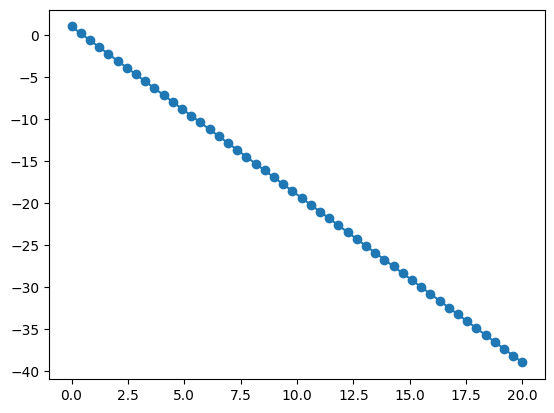

In [7]:
plt.plot(X, y,marker='o')

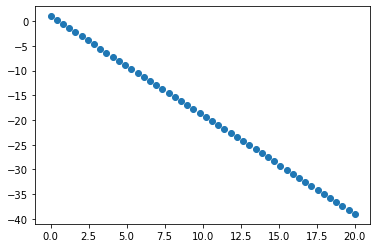

#### Use your code from practical session 1 and create a function to perform GD for single variable linear regression.
#### The function should take the following input parameters:
##### Input data (X), Target Labels (y), Learning Rate (alpha), Maximum number of iterations
#### The function should return the following:
##### All Theta_0 and Theta_1 values till converge, and equivellant Losses, all hypothesis output, and optimum values of Theta_0 and Theta_1
#### Implement the stop criteria (Gradient Check).
#### Implement the convergence check (cost check).
#### You can use any small values for stop criteria and convergence check. However, the used values in the current implementation used 0.001 for both.

In [17]:
def gd(X,y,max_iterations=100,e=0.0001,learning_rate=0.001):
    theta_0 = 0.0
    theta_1 = 0.0
    m = len(y)
    cost_sum = []
    for _ in range(max_iterations):
        predictions = theta_0 + theta_1 * X
        error = predictions - y
        cost = (1 / (2 * m)) * np.linalg.norm(error)**2
        cost_sum.append(cost)
        gradient_0 = (1 / m) * np.sum(error)
        gradient_1 = (1 / m) * np.sum(error * X)    
        if abs(gradient_0) <= e and abs(gradient_1) <= e:
            break            
        theta_0 -= learning_rate * gradient_0
        theta_1 -= learning_rate * gradient_1      
    return theta_0,theta_1,cost_sum

In [18]:
theta_0,theta_1,cost_sum = gd(X,y)

In [19]:
theta_0

-0.11354954451864657

In [20]:
theta_1

-1.9171689348740093

In [21]:
cost_sum

[249.88775510204087,
 186.82544901821944,
 139.68837516021625,
 104.4549018738267,
 78.11898842228952,
 58.43371572199665,
 43.719583789283334,
 32.721220227470425,
 24.500274414542673,
 18.355359342017675,
 13.762210705990885,
 10.328957746061073,
 7.762689631346785,
 5.844464905842485,
 4.410631849965178,
 3.338866049639039,
 2.537733926791349,
 1.938891812968691,
 1.4912550069458363,
 1.156639332215653,
 0.9065033409350506,
 0.7195132158124088,
 0.5797226123323644,
 0.47521214916916626,
 0.3970724708856112,
 0.3386441199013128,
 0.2949493651570235,
 0.2622675122555592,
 0.23781746140676588,
 0.21952042966789273,
 0.2058225934248728,
 0.1955625193327805,
 0.18787207319369542,
 0.18210235251955686,
 0.1777683234973333,
 0.17450743889530923,
 0.17204870627464977,
 0.1701895674691547,
 0.1687786167375695,
 0.16770268313644945,
 0.16687717500799543,
 0.16623886279423875,
 0.1657404844220147,
 0.16534671300117218,
 0.1650311428082448,
 0.16477403640587818,
 0.1645606406868144,
 0.16437992

In [96]:
def gd(X, y, max_iterations=100, e=0.0001, learning_rate=0.001):
    theta_0 = 0.0
    theta_1 = 0.0
    m = len(y)
    theta_0_values = []
    theta_1_values = []
    cost_sum = []
    hypothesis_outputs = []

    for _ in range(max_iterations):
        predictions = theta_0 + theta_1 * X
        error = predictions - y
        cost = (1 / (2 * m)) * np.linalg.norm(error)**2
        cost_sum.append(cost)
        gradient_0 = (1 / m) * np.sum(error)
        gradient_1 = (1 / m) * np.sum(error * X)

        theta_0_values.append(theta_0)
        theta_1_values.append(theta_1)
        hypothesis_outputs.append(predictions)

        if abs(gradient_0) <= e and abs(gradient_1) <= e:
            break

        theta_0 -= learning_rate * gradient_0
        theta_1 -= learning_rate * gradient_1
    return theta_0,theta_1,cost_sum,theta_0_values,theta_1_values 

In [30]:
gd(X,y)

In [79]:
def gd(X, y, max_iterations=100, e=0.0001, learning_rate=0.001):
    theta_0 = 0.0
    theta_1 = 0.0
    m = len(y)
    theta_0_values = []
    theta_1_values = []
    cost_sum = []
    for iteration in range(max_iterations):
        predictions = theta_0 + theta_1 * X
        error = predictions - y
        cost = (1 / (2 * m)) * np.linalg.norm(error)**2
        cost_sum.append(cost)
        gradient_0 = (1 / m) * np.sum(error)
        gradient_1 = (1 / m) * np.sum(error * X)
        
        theta_0_values.append(theta_0)
        theta_1_values.append(theta_1)

        print(f"****************** Iteration {iteration} ********************")
        print(f"\nh(x):\n{predictions}\n")
        print(f"Error Vector:\n{error}\n")
        print(f"j = {cost}\n")
        print(f"Gradient Vector:\n{np.array([[gradient_0], [gradient_1]])}\n")
        print(f"Gradient Vector Norm:\n{np.linalg.norm(np.array([[gradient_0], [gradient_1]]))}\n")
        print(f"theta_0_new : {theta_0 - learning_rate * gradient_0:.4f}")
        print(f"theta_1_new : {theta_1 - learning_rate * gradient_1:.4f}\n")

        if abs(gradient_0) <= e and abs(gradient_1) <= e:
            break

        theta_0 -= learning_rate * gradient_0
        theta_1 -= learning_rate * gradient_1
    return theta_0,theta_1,cost_sum,theta_0_values,theta_1_values     


In [97]:
newtheta_0,newtheta_1,cost,theta_0_values,theta_1_values=gd(X, y)

In [72]:
newtheta_0

-0.1667952838114192

In [73]:
gd(X, y)

****************** Iteration 0 ********************

h(x):
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0.]

Error Vector:
[ 6.77398377  1.08329857  0.95313918 -7.22442883 -5.79998165  3.73096448
 -0.80897396  8.99130163  0.17192151  4.72356793 12.22686826  2.98579068
 -1.48718918  4.01763037  7.20707772 11.69462878 -0.84021961 12.23903382
 11.54413549  2.55550616  1.42845279 13.99922988  8.5373117   2.19049968
  9.34336402 17.45177056  8.60898181 14.802307   12.65517172 13.26203489
 11.97697428  6.76055825 12.25486099 17.16052115 18.45923392 19.90744348
 15.30817454 20.01399329 16.72061623 21.3947308  20.61165515 16.24997024
 21.53276023 22.71114546 10.24692142 21.44191878 25.18466606 16.68139868
 18.74737527 27.9118713  19.68741894

(-0.1667952838114192,
 -1.9105045330486339,
 [260.0153372261383,
  197.73957908877165,
  151.11681840177695,
  116.2126741827468,
  90.081672129473,
  70.51868292078245,
  55.872836501738796,
  44.908209014217555,
  36.69952606819915,
  30.55408099635992,
  25.953278955773964,
  22.508873919953473,
  19.93020550316546,
  17.999670809125,
  16.55436143064602,
  15.47231598952448,
  14.662228100592712,
  14.05574123906173,
  13.60168029299683,
  13.261733015108103,
  13.007216941655678,
  12.816658946304797,
  12.673983173131894,
  12.567154432678949,
  12.487162580416527,
  12.427262171685387,
  12.382403229372471,
  12.348805088134396,
  12.323637352877661,
  12.304781048326367,
  12.290649803647486,
  12.28005598232133,
  12.272110460269863,
  12.266147594752995,
  12.26166905233308,
  12.258301755680915,
  12.25576640045224,
  12.253853885447496,
  12.252407667051019,
  12.25131054888208,
  12.250474791867193,
  12.249834710145763,
  12.249341127994928,
  12.248957230006358,
  12.248

#### Try your function with any input parameterss of your choice.
##### The following results uses alpha = 0.0005 and max. iterations = 300.

In [89]:
gd(X, y,max_iterations=300,learning_rate=0.0005)

****************** Iteration 0 ********************

h(x):
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0.]

Error Vector:
[ 6.77398377  1.08329857  0.95313918 -7.22442883 -5.79998165  3.73096448
 -0.80897396  8.99130163  0.17192151  4.72356793 12.22686826  2.98579068
 -1.48718918  4.01763037  7.20707772 11.69462878 -0.84021961 12.23903382
 11.54413549  2.55550616  1.42845279 13.99922988  8.5373117   2.19049968
  9.34336402 17.45177056  8.60898181 14.802307   12.65517172 13.26203489
 11.97697428  6.76055825 12.25486099 17.16052115 18.45923392 19.90744348
 15.30817454 20.01399329 16.72061623 21.3947308  20.61165515 16.24997024
 21.53276023 22.71114546 10.24692142 21.44191878 25.18466606 16.68139868
 18.74737527 27.9118713  19.68741894

(-0.1784822062899876,
 -1.9096317666620104,
 [260.0153372261383,
  227.75268365651013,
  199.69109764784443,
  175.28353850003444,
  154.05419824697637,
  135.58922610834637,
  119.5286607539945,
  105.55941310601253,
  93.40916288303926,
  82.84104990414464,
  73.64905666292105,
  65.65399215824804,
  58.699998689280505,
  52.65151351703681,
  47.390626162275005,
  42.814779822001,
  38.83477209530881,
  35.37301604408107,
  32.362027689128055,
  29.743110456544482,
  27.465210928473482,
  25.483923591927592,
  23.760625183931367,
  22.261721757641027,
  20.957993791514284,
  19.824026574885192,
  18.837714765703645,
  17.979831462134023,
  17.23365338736124,
  16.584634880840156,
  16.020124340672805,
  15.529117589352849,
  15.102043354912679,
  14.730576685576017,
  14.407476660563182,
  14.126445233333305,
  13.882004455509634,
  13.669389688053077,
  13.484456717909467,
  13.323600969433619,
  13.183687235672558,
  13.061988559667766,
  12.956133074309637,
  12.864057764423567,
 

****************** Iteration 0 ********************

h(x):
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.]

Error Vector:
[-1.         -0.18367347  0.63265306  1.44897959  2.26530612  3.08163265
  3.89795918  4.71428571  5.53061224  6.34693878  7.16326531  7.97959184
  8.79591837  9.6122449  10.42857143 11.24489796 12.06122449 12.87755102
 13.69387755 14.51020408 15.32653061 16.14285714 16.95918367 17.7755102
 18.59183673 19.40816327 20.2244898  21.04081633 21.85714286 22.67346939
 23.48979592 24.30612245 25.12244898 25.93877551 26.75510204 27.57142857
 28.3877551  29.20408163 30.02040816 30.83673469 31.65306122 32.46938776
 33.28571429 34.10204082 34.91836735 35.73469388 36.55102041 37.36734694
 38.18367347 39.        ]

j = 249.88775510204084

Gradient Vector:
[[ 19.       ]
 [259.3877551]]

Gradient Vector Norm:
260.08269357432516

theta_0_new : -0.0095
theta_1_new : -0.12969387


Gradient Vector Norm:
3.150846624874574

theta_0_new : -0.13151756202565473
theta_1_new : -1.8941776723448396

****************** Iteration 64 ********************

h(x):
[ -0.13151756  -0.90465131  -1.67778505  -2.45091879  -3.22405254
  -3.99718628  -4.77032002  -5.54345377  -6.31658751  -7.08972126
  -7.862855    -8.63598874  -9.40912249 -10.18225623 -10.95538998
 -11.72852372 -12.50165746 -13.27479121 -14.04792495 -14.82105869
 -15.59419244 -16.36732618 -17.14045993 -17.91359367 -18.68672741
 -19.45986116 -20.2329949  -21.00612865 -21.77926239 -22.55239613
 -23.32552988 -24.09866362 -24.87179736 -25.64493111 -26.41806485
 -27.1911986  -27.96433234 -28.73746608 -29.51059983 -30.28373357
 -31.05686731 -31.83000106 -32.6031348  -33.37626855 -34.14940229
 -34.92253603 -35.69566978 -36.46880352 -37.24193727 -38.01507101]

Error Vector:
[-1.13151756 -1.08832478 -1.04513199 -1.0019392  -0.95874641 -0.91555363
 -0.87236084 -0.82916805 -0.78597527 -0.74278248 -0.69958969 -0.65639691
 -0.61

#### Calculate r2 score

In [58]:
newtheta_0

-0.1667952838114192

In [99]:
h = newtheta_0 + newtheta_1 * X

In [55]:
from sklearn.metrics import r2_score

In [100]:
r2_score(y,h)

0.8244534595623413

r2_score: 0.9975395965150151


##### It is recommended to define a function for each plot. This will help you to easly plot the learning curves when you use different values of hyperparameters.

#### Plot loss vs. epochs

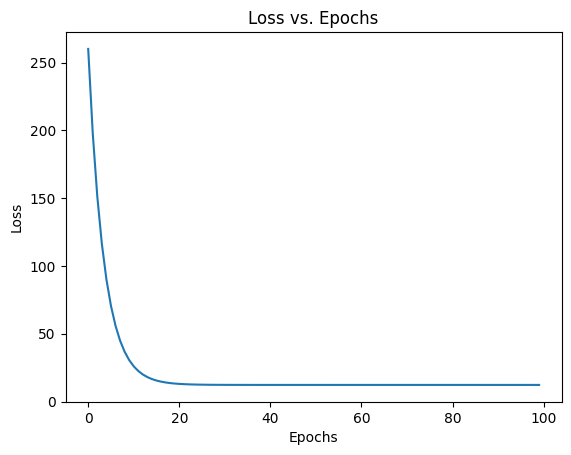

In [77]:
plt.plot(cost)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss vs. Epochs')
plt.show()

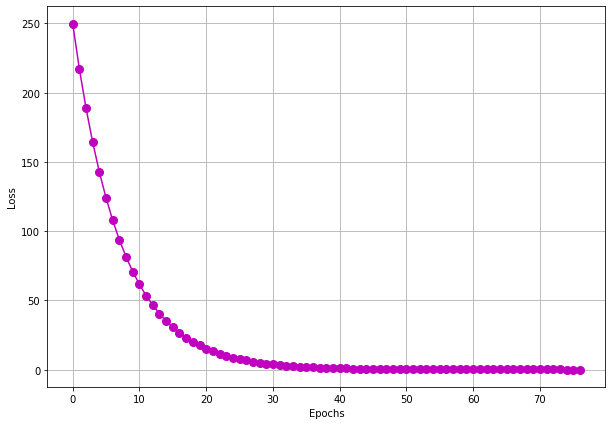

#### Plot Theta_0 vs. loss and Theta_1 vs. loss

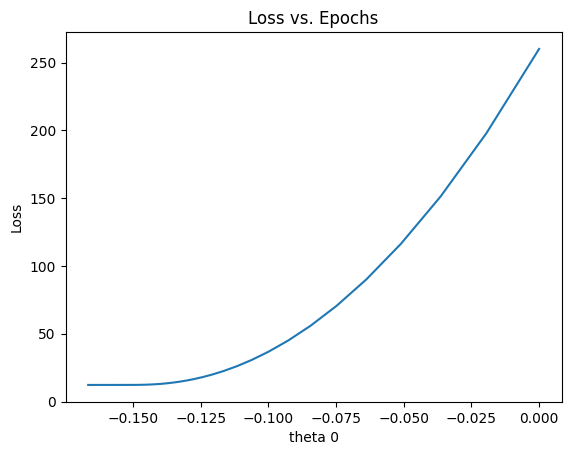

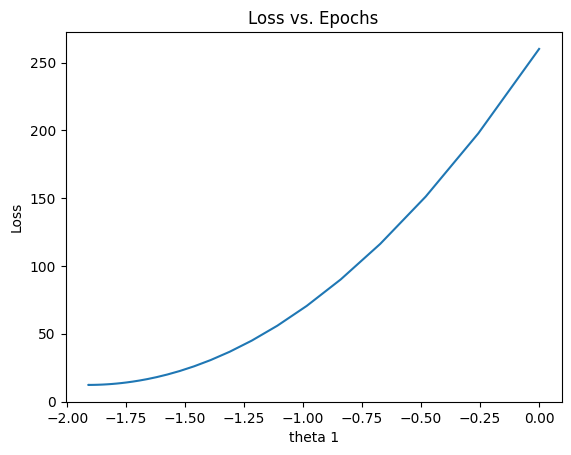

In [103]:
plt.plot(theta_0_values ,cost)
plt.xlabel('theta 0')
plt.ylabel('Loss')
plt.title('Loss vs. Epochs')
plt.show()
plt.plot(theta_1_values ,cost)
plt.xlabel('theta 1')
plt.ylabel('Loss')
plt.title('Loss vs. Epochs')
plt.show()

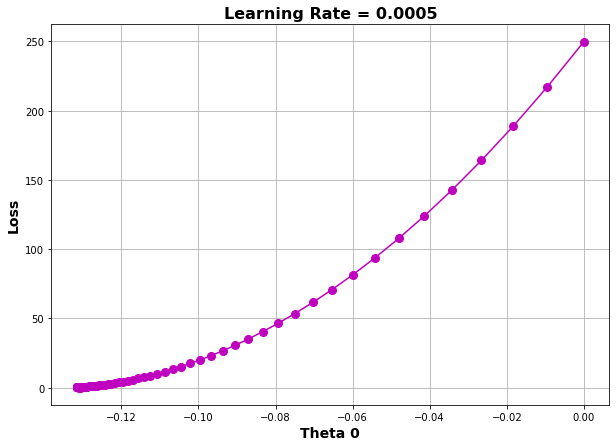

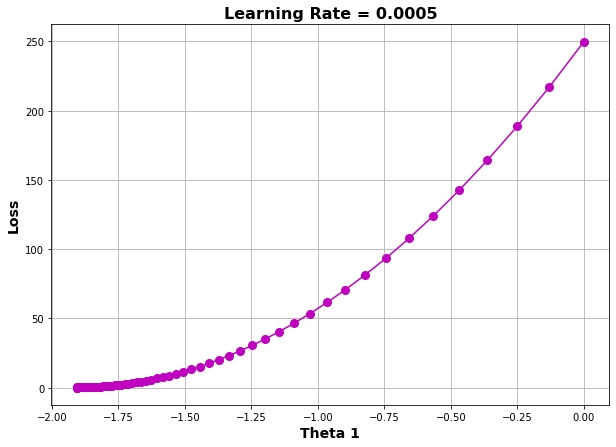

#### Plot all regression lines till converge

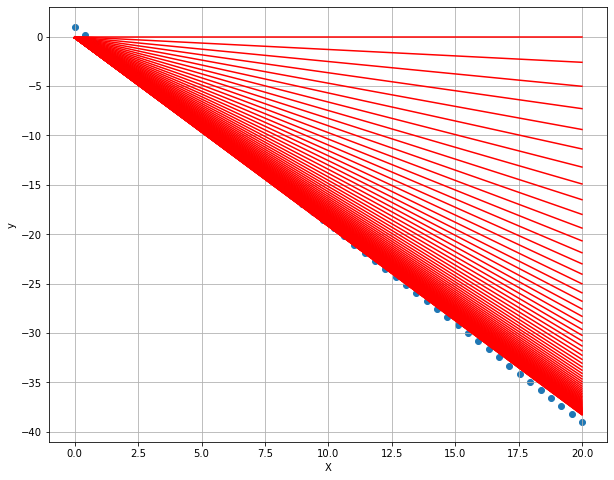

#### Plot the best regression line

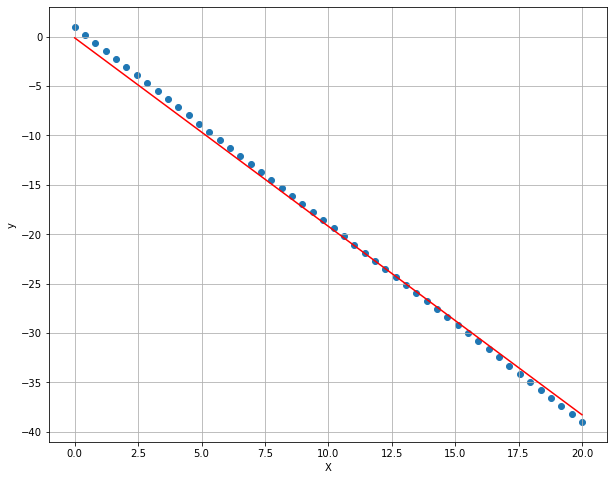

#### Try different learning rate and number of iterations then plot loss vs. epochs, loss vs. Theat_0 and Theta_1
#### all regression lines till converge, and the best regression line
#### and see the difference in output.

##### The following results uses alpha = 0.00005 and max. iterations = 1000.

****************** Iteration 0 ********************

h(x):
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.]

Error Vector:
[-1.         -0.18367347  0.63265306  1.44897959  2.26530612  3.08163265
  3.89795918  4.71428571  5.53061224  6.34693878  7.16326531  7.97959184
  8.79591837  9.6122449  10.42857143 11.24489796 12.06122449 12.87755102
 13.69387755 14.51020408 15.32653061 16.14285714 16.95918367 17.7755102
 18.59183673 19.40816327 20.2244898  21.04081633 21.85714286 22.67346939
 23.48979592 24.30612245 25.12244898 25.93877551 26.75510204 27.57142857
 28.3877551  29.20408163 30.02040816 30.83673469 31.65306122 32.46938776
 33.28571429 34.10204082 34.91836735 35.73469388 36.55102041 37.36734694
 38.18367347 39.        ]

j = 249.88775510204084

Gradient Vector:
[[ 19.       ]
 [259.3877551]]

Gradient Vector Norm:
260.08269357432516

theta_0_new : -0.00095
theta_1_new : -0.0129693


Error Vector:
[-1.03616786 -0.42185497  0.19245793  0.80677082  1.42108371  2.0353966
  2.64970949  3.26402238  3.87833527  4.49264817  5.10696106  5.72127395
  6.33558684  6.94989973  7.56421262  8.17852551  8.79283841  9.4071513
 10.02146419 10.63577708 11.25008997 11.86440286 12.47871575 13.09302865
 13.70734154 14.32165443 14.93596732 15.55028021 16.1645931  16.77890599
 17.39321889 18.00753178 18.62184467 19.23615756 19.85047045 20.46478334
 21.07909623 21.69340913 22.30772202 22.92203491 23.5363478  24.15066069
 24.76497358 25.37928647 25.99359937 26.60791226 27.22222515 27.83653804
 28.45085093 29.06516382]

j = 137.49780357676352

Gradient Vector:
[[ 14.01449798]
 [192.36157561]]

Gradient Vector Norm:
192.8714129238948

theta_0_new : -0.03686858155519533
theta_1_new : -0.5045514947736295

****************** Iteration 45 ********************

h(x):
[ -0.03686858  -0.24280797  -0.44874735  -0.65468674  -0.86062612
  -1.06656551  -1.2725049   -1.47844428  -1.68438367  -1.8903230


j = 68.83712790496376

Gradient Vector:
[[  9.82460151]
 [136.03098233]]

Gradient Vector Norm:
136.3853032673908

theta_0_new : -0.06685086270355442
theta_1_new : -0.9177054348813832

****************** Iteration 96 ********************

h(x):
[ -0.06685086  -0.44142451  -0.81599816  -1.1905718   -1.56514545
  -1.9397191   -2.31429274  -2.68886639  -3.06344004  -3.43801368
  -3.81258733  -4.18716098  -4.56173463  -4.93630827  -5.31088192
  -5.68545557  -6.06002921  -6.43460286  -6.80917651  -7.18375015
  -7.5583238   -7.93289745  -8.30747109  -8.68204474  -9.05661839
  -9.43119203  -9.80576568 -10.18033933 -10.55491298 -10.92948662
 -11.30406027 -11.67863392 -12.05320756 -12.42778121 -12.80235486
 -13.1769285  -13.55150215 -13.9260758  -14.30064944 -14.67522309
 -15.04979674 -15.42437039 -15.79894403 -16.17351768 -16.54809133
 -16.92266497 -17.29723862 -17.67181227 -18.04638591 -18.42095956]

Error Vector:
[-1.06685086 -0.62509798 -0.1833451   0.25840779  0.70016067  1.14191356
  1.5


j = 31.81571190585062

Gradient Vector:
[[ 6.57608066]
 [92.35572627]]

Gradient Vector Norm:
92.58955130845696

theta_0_new : -0.08984261951516516
theta_1_new : -1.238058338321551

****************** Iteration 153 ********************

h(x):
[ -0.08984262  -0.59517255  -1.10050249  -1.60583242  -2.11116236
  -2.61649229  -3.12182222  -3.62715216  -4.13248209  -4.63781203
  -5.14314196  -5.64847189  -6.15380183  -6.65913176  -7.1644617
  -7.66979163  -8.17512156  -8.6804515   -9.18578143  -9.69111137
 -10.1964413  -10.70177123 -11.20710117 -11.7124311  -12.21776104
 -12.72309097 -13.2284209  -13.73375084 -14.23908077 -14.74441071
 -15.24974064 -15.75507057 -16.26040051 -16.76573044 -17.27106038
 -17.77639031 -18.28172024 -18.78705018 -19.29238011 -19.79771005
 -20.30303998 -20.80836991 -21.31369985 -21.81902978 -22.32435972
 -22.82968965 -23.33501958 -23.84034952 -24.34567945 -24.85100939]

Error Vector:
[-1.08984262 -0.77884602 -0.46784943 -0.15685283  0.15414377  0.46514036
  0.7761

h(x):
[ -0.10315948  -0.68542902  -1.26769856  -1.8499681   -2.43223764
  -3.01450718  -3.59677672  -4.17904625  -4.76131579  -5.34358533
  -5.92585487  -6.50812441  -7.09039395  -7.67266349  -8.25493303
  -8.83720257  -9.41947211 -10.00174165 -10.58401118 -11.16628072
 -11.74855026 -12.3308198  -12.91308934 -13.49535888 -14.07762842
 -14.65989796 -15.2421675  -15.82443704 -16.40670658 -16.98897611
 -17.57124565 -18.15351519 -18.73578473 -19.31805427 -19.90032381
 -20.48259335 -21.06486289 -21.64713243 -22.22940197 -22.81167151
 -23.39394104 -23.97621058 -24.55848012 -25.14074966 -25.7230192
 -26.30528874 -26.88755828 -27.46982782 -28.05209736 -28.6343669 ]

Error Vector:
[-1.10315948 -0.86910249 -0.6350455  -0.40098851 -0.16693152  0.06712548
  0.30118247  0.53523946  0.76929645  1.00335344  1.23741043  1.47146743
  1.70552442  1.93958141  2.1736384   2.40769539  2.64175238  2.87580937
  3.10986637  3.34392336  3.57798035  3.81203734  4.04609433  4.28015132
  4.51420832  4.74826531  4

Error Vector:
[-1.11337893 -0.93966527 -0.76595161 -0.59223795 -0.41852429 -0.24481063
 -0.07109696  0.1026167   0.27633036  0.45004402  0.62375768  0.79747134
  0.971185    1.14489866  1.31861232  1.49232598  1.66603965  1.83975331
  2.01346697  2.18718063  2.36089429  2.53460795  2.70832161  2.88203527
  3.05574893  3.22946259  3.40317626  3.57688992  3.75060358  3.92431724
  4.0980309   4.27174456  4.44545822  4.61917188  4.79288554  4.9665992
  5.14031287  5.31402653  5.48774019  5.66145385  5.83516751  6.00888117
  6.18259483  6.35630849  6.53002215  6.70373581  6.87744948  7.05116314
  7.2248768   7.39859046]

j = 8.08010689404443

Gradient Vector:
[[ 3.14260576]
 [46.19171882]]

Gradient Vector Norm:
46.29849737188856

theta_0_new : -0.11353606105419035
theta_1_new : -1.5767111164794902

****************** Iteration 255 ********************

h(x):
[ -0.11353606  -0.75709162  -1.40064718  -2.04420273  -2.68775829
  -3.33131385  -3.97486941  -4.61842497  -5.26198052  -5.90553608
 

theta_0_new : -0.12177000204725738
theta_1_new : -1.7006104572918064

****************** Iteration 322 ********************

h(x):
[ -0.12177     -0.81589672  -1.51002344  -2.20415015  -2.89827687
  -3.59240359  -4.28653031  -4.98065702  -5.67478374  -6.36891046
  -7.06303717  -7.75716389  -8.45129061  -9.14541733  -9.83954404
 -10.53367076 -11.22779748 -11.9219242  -12.61605091 -13.31017763
 -14.00430435 -14.69843106 -15.39255778 -16.0866845  -16.78081122
 -17.47493793 -18.16906465 -18.86319137 -19.55731809 -20.2514448
 -20.94557152 -21.63969824 -22.33382495 -23.02795167 -23.72207839
 -24.41620511 -25.11033182 -25.80445854 -26.49858526 -27.19271198
 -27.88683869 -28.58096541 -29.27509213 -29.96921884 -30.66334556
 -31.35747228 -32.051599   -32.74572571 -33.43985243 -34.13397915]

Error Vector:
[-1.12177    -0.99957019 -0.87737038 -0.75517056 -0.63297075 -0.51077094
 -0.38857112 -0.26637131 -0.1441715  -0.02197168  0.10022813  0.22242794
  0.34462776  0.46682757  0.58902738  0.7112272 


Error Vector:
[-1.12545257 -1.02723783 -0.92902308 -0.83080834 -0.7325936  -0.63437885
 -0.53616411 -0.43794937 -0.33973462 -0.24151988 -0.14330514 -0.04509039
  0.05312435  0.15133909  0.24955384  0.34776858  0.44598332  0.54419807
  0.64241281  0.74062755  0.8388423   0.93705704  1.03527178  1.13348653
  1.23170127  1.32991601  1.42813076  1.5263455   1.62456024  1.72277499
  1.82098973  1.91920447  2.01741922  2.11563396  2.2138487   2.31206345
  2.41027819  2.50849293  2.60670768  2.70492242  2.80313716  2.90135191
  2.99956665  3.09778139  3.19599614  3.29421088  3.39242562  3.49064037
  3.58885511  3.68706985]

j = 1.8246392779177878

Gradient Vector:
[[ 1.28080864]
 [21.15633959]]

Gradient Vector Norm:
21.195074327352817

theta_0_new : -0.1255166095763225
theta_1_new : -1.7604316959298962

****************** Iteration 370 ********************

h(x):
[ -0.12551661  -0.84406016  -1.56260371  -2.28114726  -2.99969081
  -3.71823436  -4.43677791  -5.15532146  -5.873865    -6.592408

theta_0_new : -0.12838891843775904
theta_1_new : -1.81026389922397

****************** Iteration 427 ********************

h(x):
[ -0.12838892  -0.86727214  -1.60615537  -2.34503859  -3.08392182
  -3.82280504  -4.56168826  -5.30057149  -6.03945471  -6.77833794
  -7.51722116  -8.25610438  -8.99498761  -9.73387083 -10.47275406
 -11.21163728 -11.95052051 -12.68940373 -13.42828695 -14.16717018
 -14.9060534  -15.64493663 -16.38381985 -17.12270307 -17.8615863
 -18.60046952 -19.33935275 -20.07823597 -20.8171192  -21.55600242
 -22.29488564 -23.03376887 -23.77265209 -24.51153532 -25.25041854
 -25.98930176 -26.72818499 -27.46706821 -28.20595144 -28.94483466
 -29.68371789 -30.42260111 -31.16148433 -31.90036756 -32.63925078
 -33.37813401 -34.11701723 -34.85590045 -35.59478368 -36.3336669 ]

Error Vector:
[-1.12838892 -1.05094561 -0.97350231 -0.896059   -0.81861569 -0.74117239
 -0.66372908 -0.58628577 -0.50884247 -0.43139916 -0.35395585 -0.27651255
 -0.19906924 -0.12162593 -0.04418263  0.03326068  


Gradient Vector Norm:
9.705665950069054

theta_0_new : -0.13009444831874967
theta_1_new : -1.8445985880847027

****************** Iteration 485 ********************

h(x):
[ -0.13009445  -0.88299183  -1.63588921  -2.3887866   -3.14168398
  -3.89458136  -4.64747875  -5.40037613  -6.15327351  -6.90617089
  -7.65906828  -8.41196566  -9.16486304  -9.91776043 -10.67065781
 -11.42355519 -12.17645257 -12.92934996 -13.68224734 -14.43514472
 -15.18804211 -15.94093949 -16.69383687 -17.44673425 -18.19963164
 -18.95252902 -19.7054264  -20.45832379 -21.21122117 -21.96411855
 -22.71701594 -23.46991332 -24.2228107  -24.97570808 -25.72860547
 -26.48150285 -27.23440023 -27.98729762 -28.740195   -29.49309238
 -30.24598976 -30.99888715 -31.75178453 -32.50468191 -33.2575793
 -34.01047668 -34.76337406 -35.51627144 -36.26916883 -37.02206621]

Error Vector:
[-1.13009445 -1.0666653  -1.00323615 -0.93980701 -0.87637786 -0.81294871
 -0.74951956 -0.68609041 -0.62266127 -0.55923212 -0.49580297 -0.43237382
 -0.36


Error Vector:
[-1.13097983e+00 -1.07714118e+00 -1.02330254e+00 -9.69463898e-01
 -9.15625255e-01 -8.61786611e-01 -8.07947968e-01 -7.54109325e-01
 -7.00270682e-01 -6.46432038e-01 -5.92593395e-01 -5.38754752e-01
 -4.84916109e-01 -4.31077465e-01 -3.77238822e-01 -3.23400179e-01
 -2.69561536e-01 -2.15722892e-01 -1.61884249e-01 -1.08045606e-01
 -5.42069626e-02 -3.68319395e-04  5.34703239e-02  1.07308967e-01
  1.61147610e-01  2.14986254e-01  2.68824897e-01  3.22663540e-01
  3.76502183e-01  4.30340827e-01  4.84179470e-01  5.38018113e-01
  5.91856756e-01  6.45695400e-01  6.99534043e-01  7.53372686e-01
  8.07211329e-01  8.61049973e-01  9.14888616e-01  9.68727259e-01
  1.02256590e+00  1.07640455e+00  1.13024319e+00  1.18408183e+00
  1.23792048e+00  1.29175912e+00  1.34559776e+00  1.39943641e+00
  1.45327505e+00  1.50711369e+00]

j = 0.31950125912269717

Gradient Vector:
[[0.18806693]
 [6.456954  ]]

Gradient Vector Norm:
6.459692258812109

theta_0_new : -0.1309892309985654
theta_1_new : -1.868418

r2_score: 0.9965793400861428


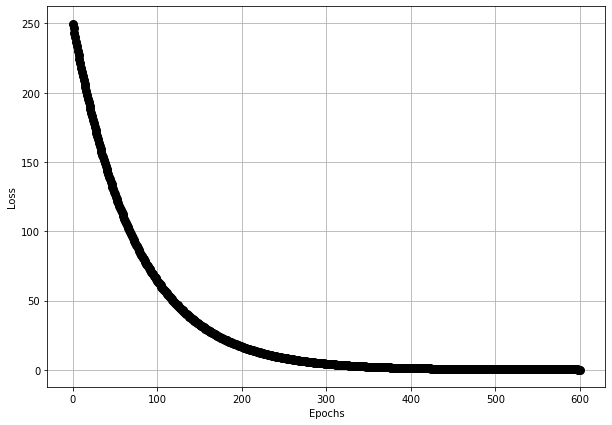

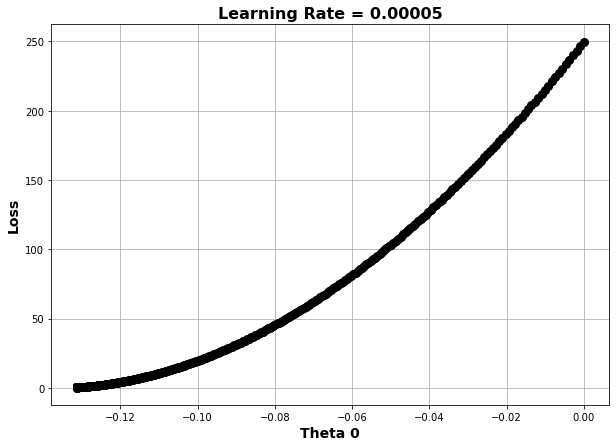

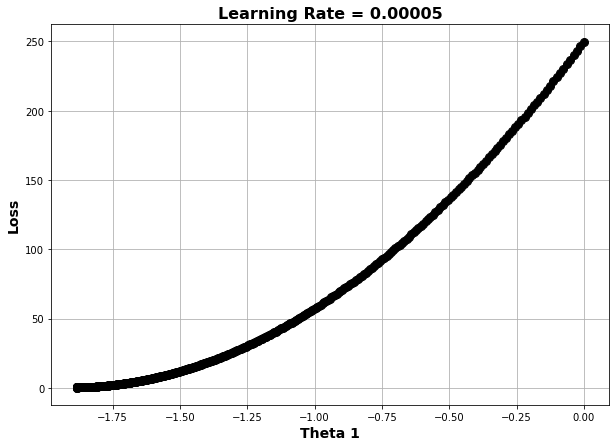

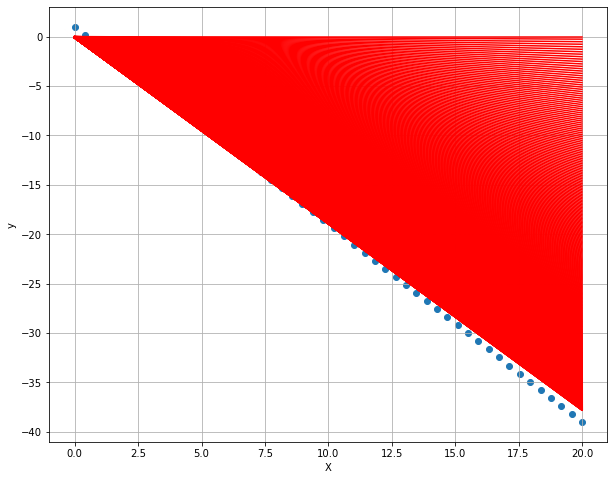

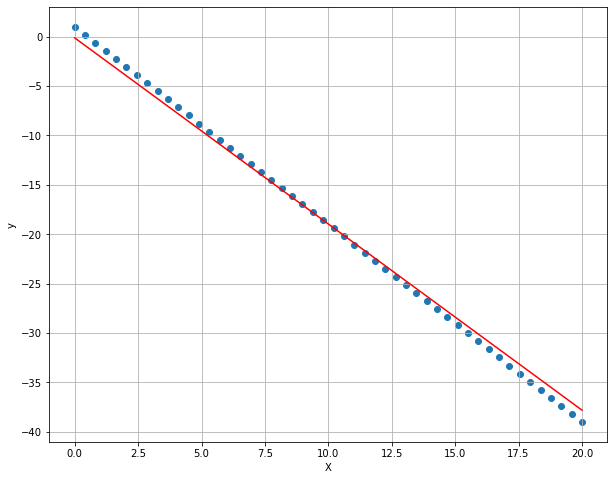

##### The following results uses alpha = 0.005 and max. iterations = 300.

****************** Iteration 0 ********************

h(x):
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.]

Error Vector:
[-1.         -0.18367347  0.63265306  1.44897959  2.26530612  3.08163265
  3.89795918  4.71428571  5.53061224  6.34693878  7.16326531  7.97959184
  8.79591837  9.6122449  10.42857143 11.24489796 12.06122449 12.87755102
 13.69387755 14.51020408 15.32653061 16.14285714 16.95918367 17.7755102
 18.59183673 19.40816327 20.2244898  21.04081633 21.85714286 22.67346939
 23.48979592 24.30612245 25.12244898 25.93877551 26.75510204 27.57142857
 28.3877551  29.20408163 30.02040816 30.83673469 31.65306122 32.46938776
 33.28571429 34.10204082 34.91836735 35.73469388 36.55102041 37.36734694
 38.18367347 39.        ]

j = 249.88775510204084

Gradient Vector:
[[ 19.       ]
 [259.3877551]]

Gradient Vector Norm:
260.08269357432516

theta_0_new : -0.095
theta_1_new : -1.296938775

r2_score: 0.9976200723230484


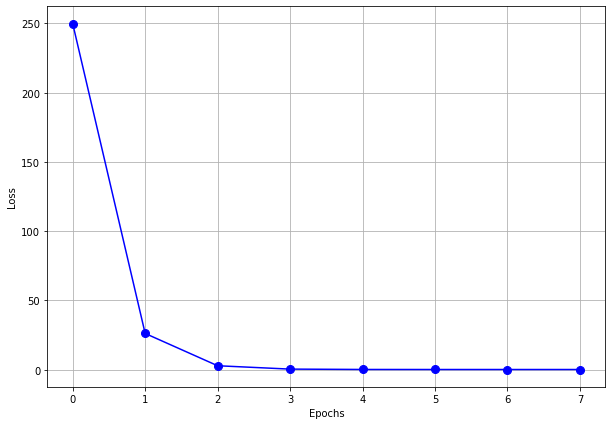

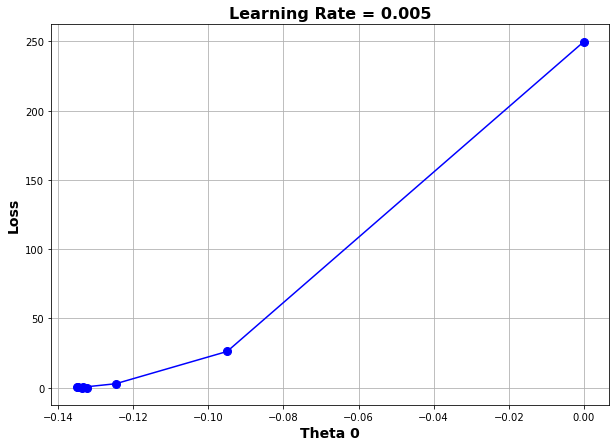

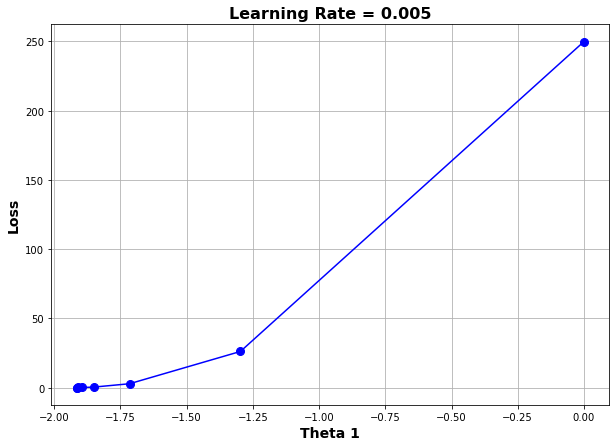

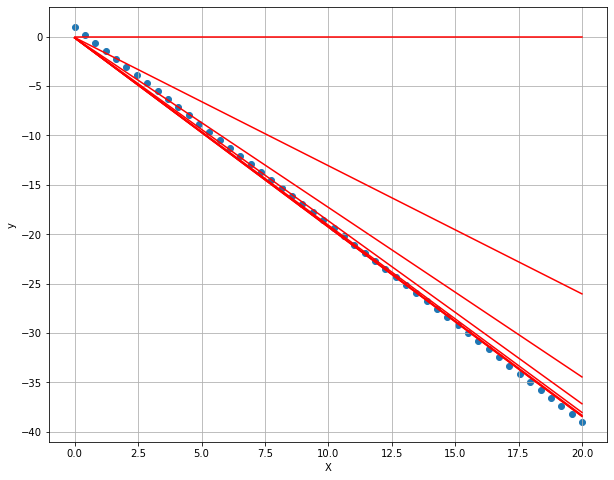

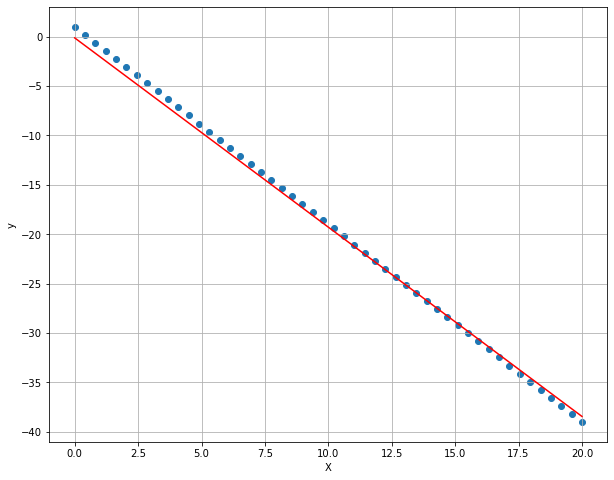

## Stochastic GD

#### Update the implementation of the Batch GD to be Stochastic and rpeat the above plots and evaluations
#### You can try different learning rate and see its effect.
#### Compare to the Batch GD.
#### Do not forget to shuffle the data.

##### Very Important notes:
- <font color='red'>Save your losses and thetas for each iterations (not each epoch).</font>
- <font color='red'>Plot loss vs. iterations (not epochs). This will allow you to see the difference between SGD (stochastic GD) and batch GD.</font>
- <font color='red'>Convergence check should be performed each epoch not each iterations. This allows you to perform more accurate decision. This is because the noisy process could lead to a deciving decision.</font>
- <font color='red'>Your result may be different from the results shown below due to the randomness of the process. As well as, the random shuffle. The results will be different also for two different run of the algorithm.</font>


In [226]:
data_matrix = np.column_stack((X,y))
np.random.seed(42)
np.random.shuffle(data_matrix)

In [312]:
def sgd(data_matrix, max_epochs=100, e=0.001, learning_rate=0.001):
    X = data_matrix[:, :-1]
    y = data_matrix[:, -1] 
    theta_0 = 0.0
    theta_1 = 0.0
    m = len(y)
    theta_0_values = []
    theta_1_values = []
    
    cost_values = []
    for epoch in range(max_epochs):
        print(f'epoch {1}')
        print(theta_0_values)      
        
        for i in range(m):
            print("%%%%%%%%%%%%%%%%%%%%%")
            print("before", theta_0_values) 
            print("before", len(theta_0_values)) 
            prediction = theta_0 + theta_1 * X[i]
            error = prediction - y[i]
            cost = (1 / 2) * error**2

            gradient_0 = error
            gradient_1 = error * X[i]

            theta_0 -= learning_rate * gradient_0
            theta_1 -= learning_rate * gradient_1
            print("value for theta0", theta_0)
            cost_values.append(cost)
            
            theta_0_values.append(theta_0[0])
            print("after", theta_0_values)
            print("after", len(theta_0_values)) 
            theta_1_values.append(theta_1[0])
            
                 
        if epoch > 1:
            if np.abs(cost_values[-1] - cost) <= e :
                break
            

        #prev_epoch_cost = cost_values[-1]

    return theta_0, theta_1, theta_0_values, theta_1_values, cost_values, epoch


In [329]:
newtheta_0,newtheta_1,theta_0_values,theta_1_values,cost_values,epoch=sgd(data_matrix,max_epochs=300,learning_rate=0.0005)

epoch 1
[]
%%%%%%%%%%%%%%%%%%%%%
before []
before 0
value for theta0 [-0.00480612]
after [-0.004806122448979592]
after 1
%%%%%%%%%%%%%%%%%%%%%
before [-0.004806122448979592]
before 1
value for theta0 [-0.02001911]
after [-0.004806122448979592, -0.020019112633766545]
after 2
%%%%%%%%%%%%%%%%%%%%%
before [-0.004806122448979592, -0.020019112633766545]
before 2
value for theta0 [-0.03011522]
after [-0.004806122448979592, -0.020019112633766545, -0.030115218340148305]
after 3
%%%%%%%%%%%%%%%%%%%%%
before [-0.004806122448979592, -0.020019112633766545, -0.030115218340148305]
before 3
value for theta0 [-0.04437399]
after [-0.004806122448979592, -0.020019112633766545, -0.030115218340148305, -0.0443739947909058]
after 4
%%%%%%%%%%%%%%%%%%%%%
before [-0.004806122448979592, -0.020019112633766545, -0.030115218340148305, -0.0443739947909058]
before 4
value for theta0 [-0.04852442]
after [-0.004806122448979592, -0.020019112633766545, -0.030115218340148305, -0.0443739947909058, -0.04852441558619486]
af

In [330]:
newtheta_0

array([-0.11668621])

In [331]:
newtheta_1

array([-1.91743082])

In [332]:
epoch

2

In [317]:
cost_values

[array([46.19762599]),
 array([462.87014072]),
 array([203.86270087]),
 array([406.62541175]),
 array([34.45198556]),
 array([306.86920861]),
 array([53.56906144]),
 array([43.67607048]),
 array([67.67720267]),
 array([17.27407597]),
 array([5.12342691]),
 array([0.05542682]),
 array([71.93638199]),
 array([1.04287537]),
 array([0.01002239]),
 array([0.32411404]),
 array([69.98700363]),
 array([66.6089696]),
 array([47.35901544]),
 array([1.58545927]),
 array([0.18334827]),
 array([1.86056713]),
 array([5.72541869]),
 array([12.61746006]),
 array([8.15599224]),
 array([0.61968217]),
 array([16.46325058]),
 array([3.17651879]),
 array([4.9304752]),
 array([0.13341807]),
 array([2.82936341]),
 array([0.01035092]),
 array([4.53012243]),
 array([0.51535412]),
 array([0.60571649]),
 array([0.41704199]),
 array([5.61506005]),
 array([2.19957455]),
 array([0.36283452]),
 array([2.52226614]),
 array([0.06379543]),
 array([0.16280394]),
 array([0.02959524]),
 array([3.33232048]),
 array([0.0154

****************** Epoch 0 ********************

Cost = 0.37828093829974396

Gradient Vector:
[[-0.86980565]
 [-1.77511358]]

Gradient Vector Norm:
1.9767625301666

theta_0_new : -0.13516909716690004
theta_1_new : -1.869971913093026

****************** Epoch 1 ********************

Cost = 0.4705021363396433

Gradient Vector:
[[-0.97005375]
 [-1.97970153]]

Gradient Vector Norm:
2.2045912095645743

theta_0_new : -0.13169704743062774
theta_1_new : -1.9207947829431942

****************** Epoch 2 ********************

Cost = 0.4672003879494755

Gradient Vector:
[[-0.96664408]
 [-1.97274302]]

Gradient Vector Norm:
2.196842232437341

theta_0_new : -0.12450421548406185
theta_1_new : -1.9226485332326042

****************** Epoch 3 ********************

Cost = 0.4612690180123547

Gradient Vector:
[[-0.96048844]
 [-1.96018048]]

Gradient Vector Norm:
2.1828526193936026

theta_0_new : -0.11725717626212058
theta_1_new : -1.923183317357008

****************** Epoch 4 ********************

Cost = 0

In [318]:
theta_0_values

[-0.004806122448979592,
 -0.020019112633766545,
 -0.030115218340148305,
 -0.0443739947909058,
 -0.04852441558619486,
 -0.06091128784288604,
 -0.06608666519343678,
 -0.0707597835570617,
 -0.07657687916698412,
 -0.07951576296650369,
 -0.08111629833189418,
 -0.08128277179000584,
 -0.08728012045391098,
 -0.08800222687727918,
 -0.08793143708384672,
 -0.0883340001457821,
 -0.09424953070666181,
 -0.1000205345014293,
 -0.10488669394376074,
 -0.10577704760039791,
 -0.10607982497192049,
 -0.10704433705813976,
 -0.1087362913557145,
 -0.11124800989685424,
 -0.11326741478989517,
 -0.11271078108250022,
 -0.1155798619967207,
 -0.11684012363343241,
 -0.11841023114539663,
 -0.11815195022104112,
 -0.11934135414966178,
 -0.11941329483550628,
 -0.12091830686741864,
 -0.12041068785501875,
 -0.12096101343608862,
 -0.12050437244206046,
 -0.12217994100944966,
 -0.12322864843985268,
 -0.12365457948958417,
 -0.1247775813020582,
 -0.12459898198396399,
 -0.12488429228969662,
 -0.12500593774943825,
 -0.12629673604

##### The following results uses alpha = 0.0005 and max. iterations = 300.

r2_score: 0.9976768960178554


In [333]:
h = newtheta_0 + newtheta_1 * X

In [334]:
r2_score(y,h)

0.9976854047674233

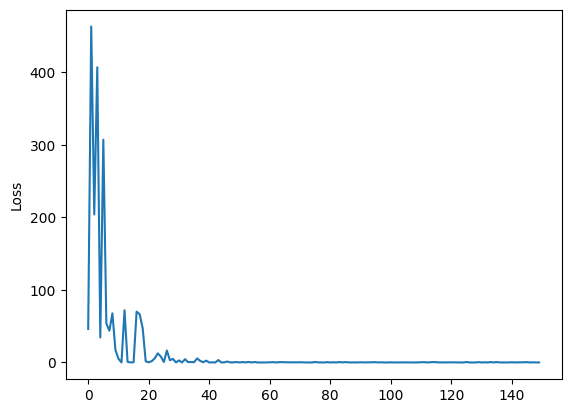

In [335]:
plt.plot(cost_values)

plt.ylabel('Loss')

plt.show()

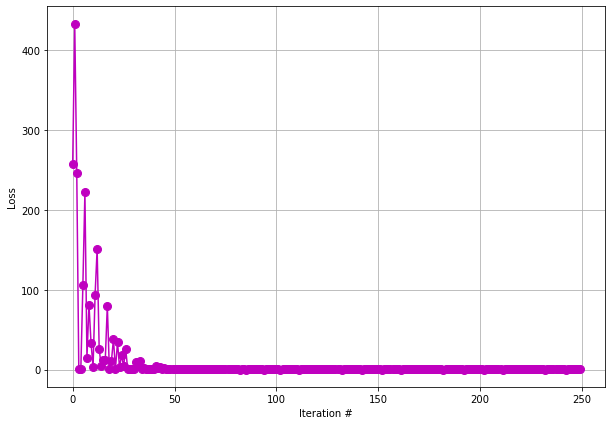

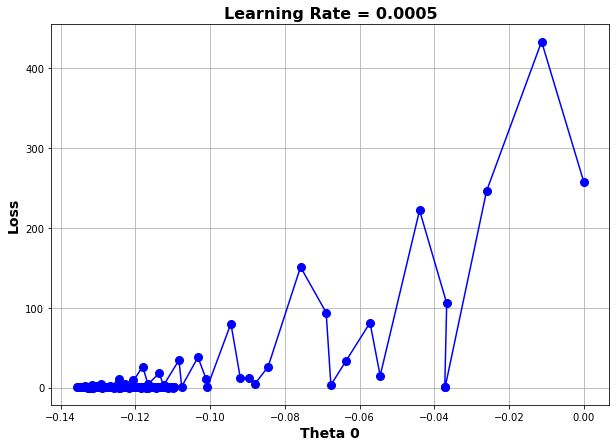

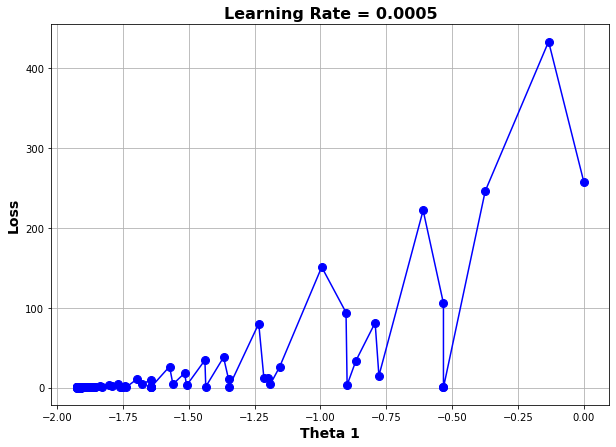

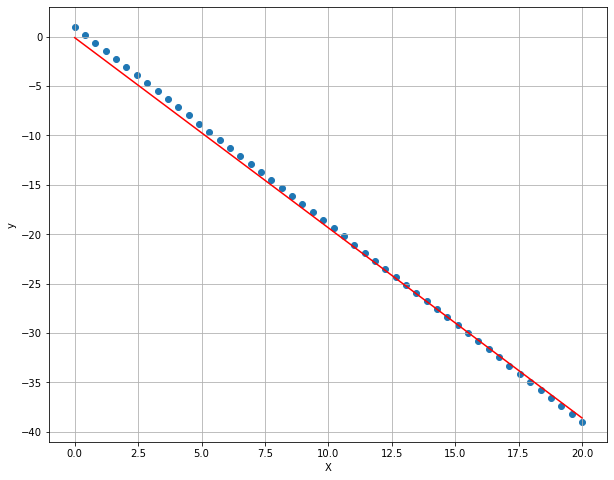

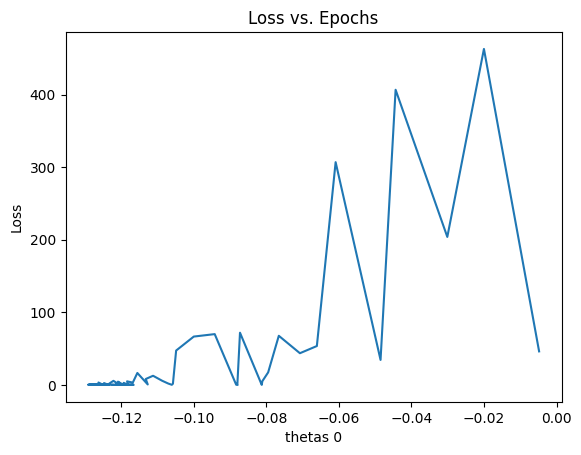

In [322]:
plt.plot(theta_0_values,cost_values)
plt.xlabel('thetas 0')
plt.ylabel('Loss')
plt.title('Loss vs. Epochs')
plt.show()

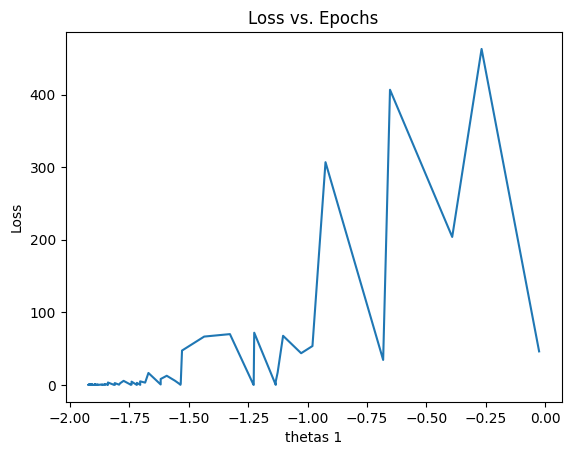

In [323]:
plt.plot(theta_1_values,cost_values)
plt.xlabel('thetas 1')
plt.ylabel('Loss')
plt.title('Loss vs. Epochs')
plt.show()

##### The following results uses alpha = 0.0001 and max. iterations = 300.

In [336]:
newtheta_0,newtheta_1,theta_0_values,theta_1_values,cost_values,epoch=sgd(data_matrix,max_epochs=300,learning_rate=0.0001)

epoch 1
[]
%%%%%%%%%%%%%%%%%%%%%
before []
before 0
value for theta0 [-0.00096122]
after [-0.0009612244897959183]
after 1
%%%%%%%%%%%%%%%%%%%%%
before [-0.0009612244897959183]
before 1
value for theta0 [-0.00403668]
after [-0.0009612244897959183, -0.0040366828726976015]
after 2
%%%%%%%%%%%%%%%%%%%%%
before [-0.0009612244897959183, -0.0040366828726976015]
before 2
value for theta0 [-0.00631907]
after [-0.0009612244897959183, -0.0040366828726976015, -0.006319066978520863]
after 3
%%%%%%%%%%%%%%%%%%%%%
before [-0.0009612244897959183, -0.0040366828726976015, -0.006319066978520863]
before 3
value for theta0 [-0.00974128]
after [-0.0009612244897959183, -0.0040366828726976015, -0.006319066978520863, -0.009741284479046926]
after 4
%%%%%%%%%%%%%%%%%%%%%
before [-0.0009612244897959183, -0.0040366828726976015, -0.006319066978520863, -0.009741284479046926]
before 4
value for theta0 [-0.01092755]
after [-0.0009612244897959183, -0.0040366828726976015, -0.006319066978520863, -0.009741284479046926, -0

****************** Epoch 0 ********************

Cost = 16.887127834434082

Gradient Vector:
[[ 5.81156224]
 [37.95305953]]

Gradient Vector Norm:
38.39542919503344

theta_0_new : -0.06824518438278841
theta_1_new : -0.9465294881483106

****************** Epoch 1 ********************

Cost = 3.4768759637568025

Gradient Vector:
[[ 2.63699676]
 [17.22120335]]

Gradient Vector Norm:
17.421928616911465

theta_0_new : -0.10250915532081234
theta_1_new : -1.4273881562733521

****************** Epoch 2 ********************

Cost = 0.5388930377939929

Gradient Vector:
[[1.03816476]
 [6.77985151]]

Gradient Vector Norm:
6.858875464652135

theta_0_new : -0.11904557794809867
theta_1_new : -1.6696771665089043

****************** Epoch 3 ********************

Cost = 0.027171708479479032

Gradient Vector:
[[0.23311675]
 [1.52239507]]

Gradient Vector Norm:
1.5401396595959387

theta_0_new : -0.1266525793929906
theta_1_new : -1.791785322149918

****************** Epoch 4 ********************

Cost = 0.

In [337]:
newtheta_0

array([-0.11923299])

In [338]:
newtheta_1

array([-1.67056413])

In [339]:
h = newtheta_0 + newtheta_1 * X
r2_score(y,h)

0.938775734851421

r2_score =  0.9976210193556192


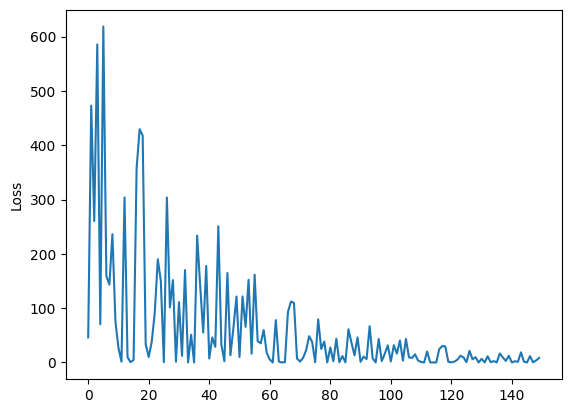

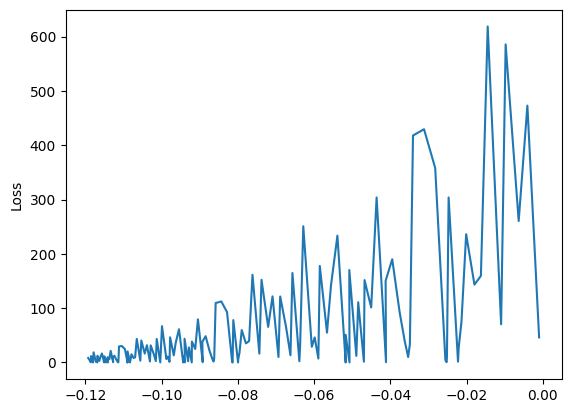

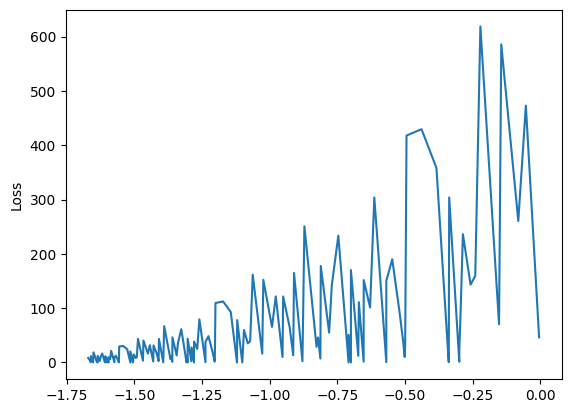

In [342]:
plt.plot(cost_values)
plt.ylabel('Loss')
plt.show()
plt.plot(theta_0_values,cost_values)
plt.ylabel('Loss')
plt.show()
plt.plot(theta_1_values,cost_values)
plt.ylabel('Loss')
plt.show()

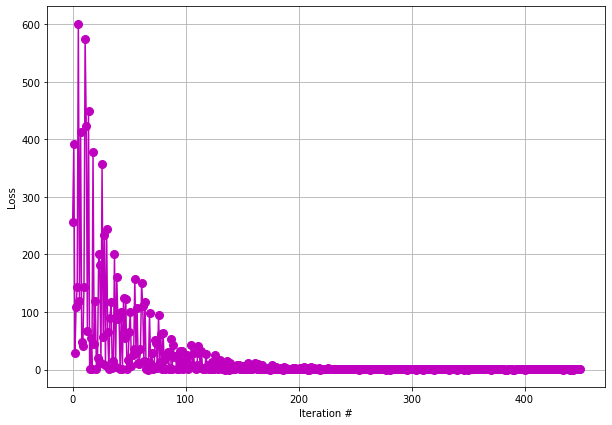

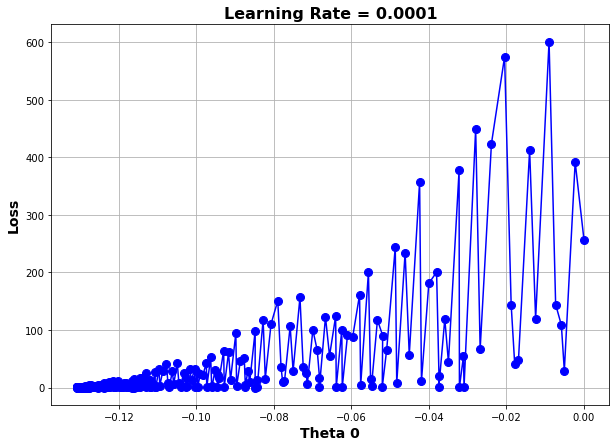

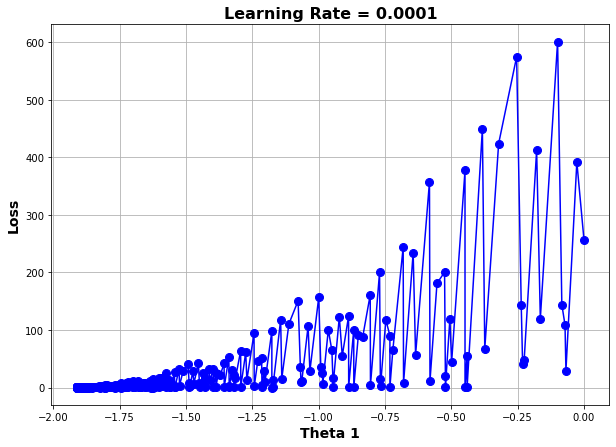

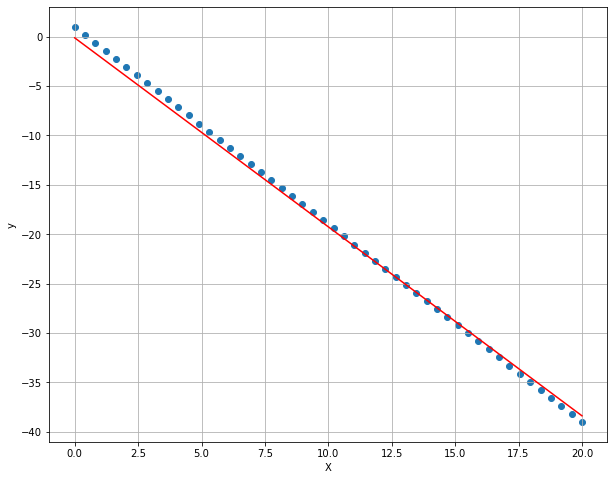

##### The following results uses alpha = 0.00007 and max. iterations = 300.

****************** Epoch 0 ********************

Cost = 124.0437076336173

Gradient Vector:
[[ 15.75079094]
 [205.72461637]]

Gradient Vector Norm:
206.32669530819234

theta_0_new : -0.051948440276973804
theta_1_new : -0.7135402661206246

****************** Epoch 1 ********************

Cost = 47.548348470307104

Gradient Vector:
[[  9.75175353]
 [127.36984205]]

Gradient Vector Norm:
127.7426058898493

theta_0_new : -0.0848670753436601
theta_1_new : -1.1703212347826775

****************** Epoch 2 ********************

Cost = 18.197486942756615

Gradient Vector:
[[ 6.0328247 ]
 [78.79607774]]

Gradient Vector Norm:
79.02668436189794

theta_0_new : -0.10488561670446958
theta_1_new : -1.453519053721322

****************** Epoch 3 ********************

Cost = 6.946707513134106

Gradient Vector:
[[ 3.72738716]
 [48.68424043]]

Gradient Vector Norm:
48.826720978186586

theta_0_new : -0.11690744458248394
theta_1_new : -1.6291086944831552

****************** Epoch 4 ********************

Cost

r2_score =  0.997655146572521


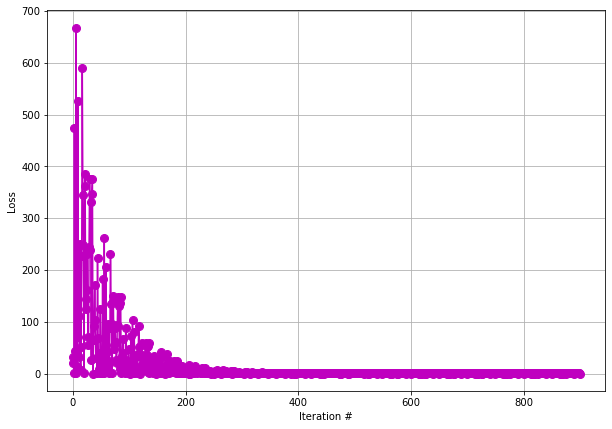

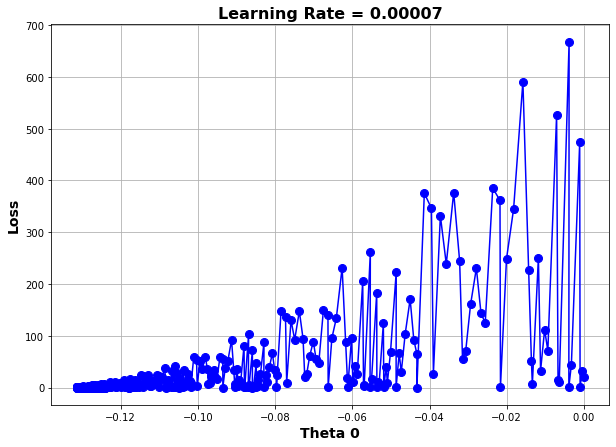

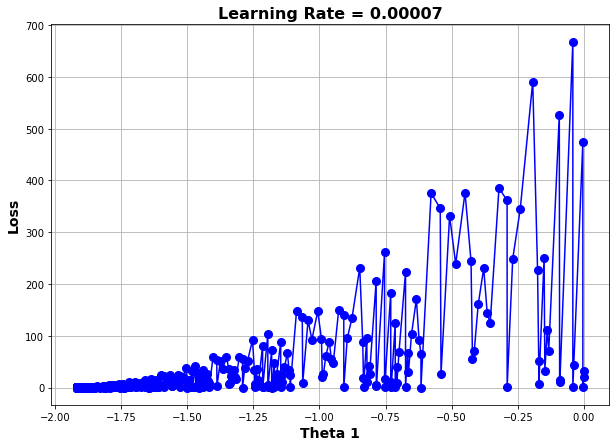

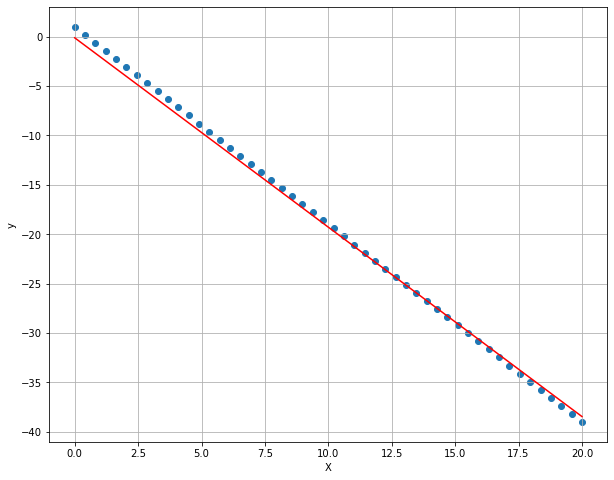

## Mini-Batch GD

#### Update the implementation of the Batch GD to be Mini-Batch and repeat the above plots and evaluations
#### Change batch size and see the effect
#### Do not forget to shuffle the data

##### Very Important notes:
- <font color='red'>Save your losses and thetas for each iterations (not each epoch).</font>
- <font color='red'>Plot loss vs. iterations (not epochs). This will allow you to see the difference between SGD (stochastic GD) and batch GD.</font>
- <font color='red'>Convergence check should be performed each epoch not each iterations. This allows you to perform more accurate decision. This is because the noisy process could lead to a deciving decision.</font>
-<font color='red'>Your result may be different from the results shown below due to the randomness of the process. As well as, the random shuffle. The results will be different also for two different run of the algorithm.</font>

In [390]:
data_matrix = np.column_stack((X,y))
np.random.seed(42)
np.random.shuffle(data_matrix)

In [457]:
def mini_batch_gd(data_matrix, batch_size=10, max_epochs=100, e=0.001, learning_rate=0.001):
    m = len(y)
    theta_0 = 0.0
    theta_1 = 0.0
    theta_0_values = []
    theta_1_values = []
    cost_values = []
    cost_values_epoch = []
    for epoch in range(max_epochs):
        print(f'epoch:{epoch}')
        for i in range(0, m, batch_size+1):
            print(f'Batch:{i}')
            mini_batch = data_matrix[i:i + batch_size]
                        
            X_batch = mini_batch[:, :-1]
            y_batch = mini_batch[:, -1]

            predictions = theta_0 + theta_1 * X_batch
            errors = predictions - y_batch
            cost = (1 / (2 * batch_size)) * np.linalg.norm(errors)**2
            gradient_0 = (1 / batch_size) * np.sum(errors)
            gradient_1 = (1 / batch_size) * np.sum(errors * X_batch)
            
            theta_0 -= learning_rate * gradient_0
            theta_1 -= learning_rate * gradient_1

            cost_values.append(cost)
            theta_0_values.append(theta_0)
            theta_1_values.append(theta_1)

        cost_values_epoch.append(cost)
        #if epoch > 1 and np.abs(cost_values[-1] - prev_epoch_cost) < e:
            #break
        if epoch > 1 or len(cost_values_epoch) >= 2:
            if np.abs(cost_values_epoch[-1] - cost_values_epoch[-2]) <= e :
                break    
        
        #prev_epoch_cost = cost_values[-1]

    return theta_0, theta_1, theta_0_values, theta_1_values, cost_values, epoch,cost_values_epoch


In [458]:
newtheta_0,newtheta_1,theta_0_values,theta_1_values,cost_values,epoch,cost_values_epoch=mini_batch_gd(data_matrix,batch_size=5,max_epochs=300,learning_rate=0.0005)

epoch:0
Batch:0
Batch:6
Batch:12
Batch:18
Batch:24
Batch:30
Batch:36
Batch:42
Batch:48
epoch:1
Batch:0
Batch:6
Batch:12
Batch:18
Batch:24
Batch:30
Batch:36
Batch:42
Batch:48
epoch:2
Batch:0
Batch:6
Batch:12
Batch:18
Batch:24
Batch:30
Batch:36
Batch:42
Batch:48
epoch:3
Batch:0
Batch:6
Batch:12
Batch:18
Batch:24
Batch:30
Batch:36
Batch:42
Batch:48
epoch:4
Batch:0
Batch:6
Batch:12
Batch:18
Batch:24
Batch:30
Batch:36
Batch:42
Batch:48
epoch:5
Batch:0
Batch:6
Batch:12
Batch:18
Batch:24
Batch:30
Batch:36
Batch:42
Batch:48
epoch:6
Batch:0
Batch:6
Batch:12
Batch:18
Batch:24
Batch:30
Batch:36
Batch:42
Batch:48
epoch:7
Batch:0
Batch:6
Batch:12
Batch:18
Batch:24
Batch:30
Batch:36
Batch:42
Batch:48
epoch:8
Batch:0
Batch:6
Batch:12
Batch:18
Batch:24
Batch:30
Batch:36
Batch:42
Batch:48
epoch:9
Batch:0
Batch:6
Batch:12
Batch:18
Batch:24
Batch:30
Batch:36
Batch:42
Batch:48
epoch:10
Batch:0
Batch:6
Batch:12
Batch:18
Batch:24
Batch:30
Batch:36
Batch:42
Batch:48
epoch:11
Batch:0
Batch:6
Batch:12
Batch:18

In [459]:
newtheta_0

-13.25466314092988

In [455]:
newtheta_1

-0.5675703249098385

In [437]:
theta_0_values

[-0.056275510204081655,
 -0.09460856536179656,
 -0.10357610639104523,
 -0.12995789500635532,
 -0.1438558442531392,
 -0.15513126262407678,
 -0.1661344921955428,
 -0.18339262641102788,
 -0.19528703359511604,
 -0.20802755275054444,
 -0.22174258670409558,
 -0.23394594412597006,
 -0.23621982306122274,
 -0.24901071852558276,
 -0.2580475198410241,
 -0.26583700123254966,
 -0.2746425819687959,
 -0.28952153375225775,
 -0.3002342187993053,
 -0.3120937342145406,
 -0.3251829550989851,
 -0.3369960385515012,
 -0.33902082265937955,
 -0.35161519460150115,
 -0.3604924010615587,
 -0.3681481488868264,
 -0.3768189223948771,
 -0.3916389679192658,
 -0.40226138884340806,
 -0.4140547522767201]

In [417]:
theta_1_values

[-0.6615243648479802,
 -1.1039077192343676,
 -1.0787769579463886,
 -1.2812110919029054,
 -1.3645707879844482,
 -1.3054471135986896,
 -1.3087412224806136,
 -1.3884104632305292,
 -1.4025518602857423,
 -1.4305416396278143,
 -1.5015813463045995,
 -1.5897211781518543,
 -1.4979414154331352,
 -1.477362212740344,
 -1.5084445785639644,
 -1.4014913380336214,
 -1.380970382041392,
 -1.4261445754706052,
 -1.42605042856632,
 -1.4429838154312082,
 -1.5058826658847246,
 -1.5890680687365653,
 -1.4960294993937204,
 -1.4731965106302598,
 -1.5029431536071955,
 -1.395442805986614,
 -1.3742359799381687,
 -1.4193492446612765,
 -1.418874551654568,
 -1.4356545443822346]

In [442]:
cost_values

[1518.9348188254899,
 768.8963689382351,
 372.4524037519346,
 907.2555446973158,
 279.70676183425866,
 735.8426584454147,
 418.6663699287617,
 650.7777757548874,
 489.5264617917308,
 516.6524032978572,
 456.4114491972334,
 314.86455007171094,
 427.6827598120436,
 825.8324106845929,
 254.52837630947116,
 757.5597208733554,
 418.12796012285975,
 638.2733056148231,
 486.59713528121847,
 513.0150688252464,
 451.95554567458703,
 311.64335599354916,
 427.1190755867581,
 823.1397793549886,
 252.943714457561,
 754.797635878895,
 416.0875424363894,
 635.8468028036589,
 484.41458354638667,
 510.8437555951683]

In [456]:
epoch

299

In [443]:
cost_values_epoch

[516.6524032978572, 513.0150688252464, 510.8437555951683]

##### The following results uses batch size=5, alpha = 0.0005 and max. iterations = 300.

****************** Epoch 0 ********************

Cost = 4.756947839402018

Gradient Vector:
[[ 8.22967595]
 [96.72704965]]

Gradient Vector Norm:
97.07651466963269

theta_0_new : -0.06646182531835047
theta_1_new : -0.9256821913217486

****************** Epoch 1 ********************

Cost = 1.122060441600775

Gradient Vector:
[[ 3.83507638]
 [46.73760466]]

Gradient Vector Norm:
46.89468519790215

theta_0_new : -0.10259516119797818
theta_1_new : -1.4293728638220262

****************** Epoch 2 ********************

Cost = 0.2643644845972613

Gradient Vector:
[[ 1.67586431]
 [22.1741011 ]]

Gradient Vector Norm:
22.23733978351637

theta_0_new : -0.11960676915575022
theta_1_new : -1.6769384840774493

****************** Epoch 3 ********************

Cost = 0.06706361377523971

Gradient Vector:
[[ 0.61510837]
 [10.10475679]]

Gradient Vector Norm:
10.12346127220413

theta_0_new : -0.12722302765329713
theta_1_new : -1.7986456643566977

****************** Epoch 4 ********************

Cost = 0

In [431]:
h = newtheta_0 + newtheta_1 * X
r2_score(y,h)

0.7914810057455081

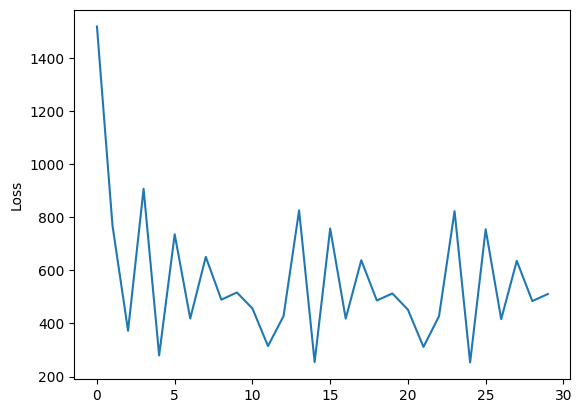

In [445]:
plt.plot(cost_values)
plt.ylabel('Loss')
plt.show()
plt.plot(cost_values)
plt.ylabel('Loss')
plt.show()

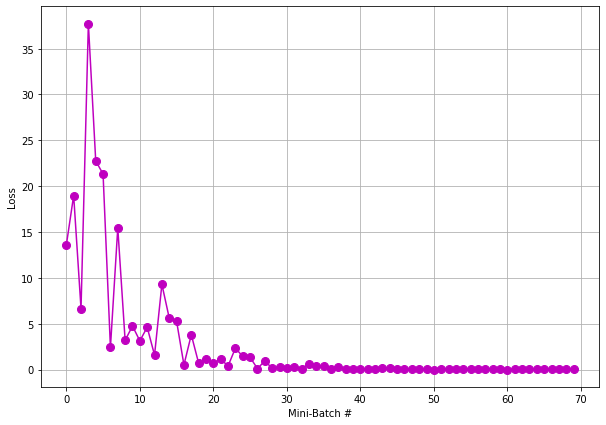

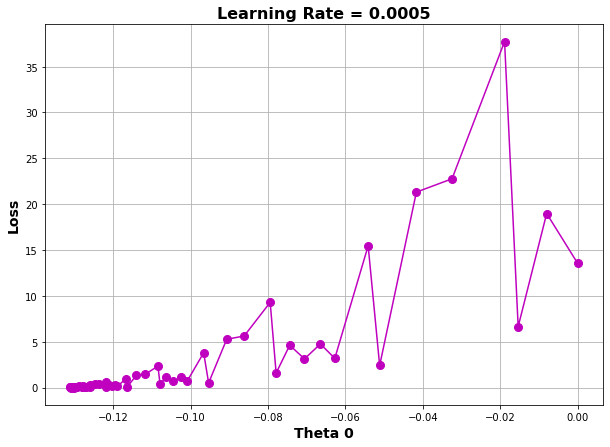

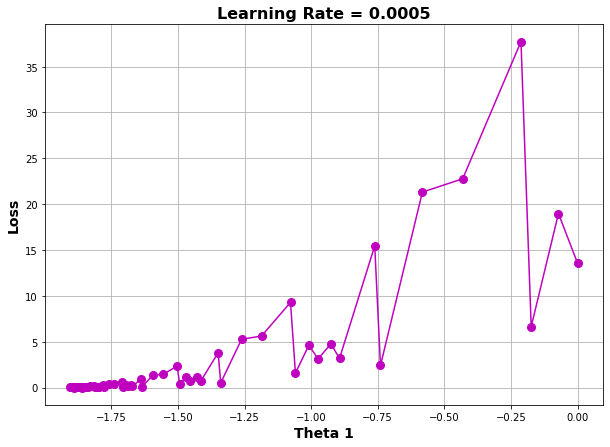

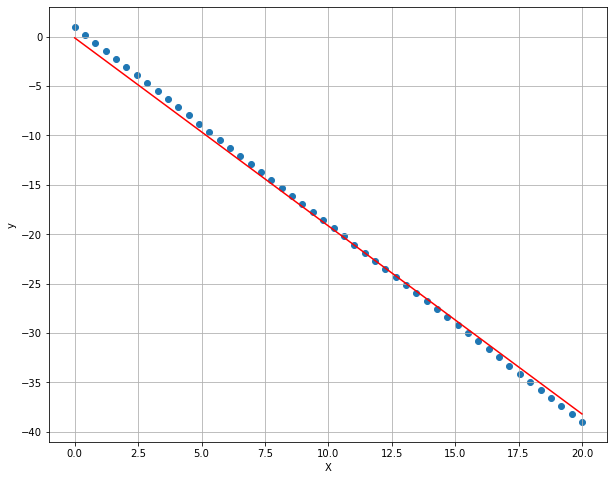

##### The following results uses batch size=10, alpha = 0.0005 and max. iterations = 300.

****************** Epoch 0 ********************

Cost = 22.539550396010963

Gradient Vector:
[[ 11.67472803]
 [157.10281459]]

Gradient Vector Norm:
157.53600739932955

theta_0_new : -0.03545598365437756
theta_1_new : -0.48835190145126706

****************** Epoch 1 ********************

Cost = 11.174953219348621

Gradient Vector:
[[  8.09250368]
 [110.51346525]]

Gradient Vector Norm:
110.80936160035174

theta_0_new : -0.06610051885857628
theta_1_new : -0.9107485292034476

****************** Epoch 2 ********************

Cost = 5.548346857077597

Gradient Vector:
[[ 5.57078759]
 [77.71577392]]

Gradient Vector Norm:
77.91517946195926

theta_0_new : -0.0874575404445202
theta_1_new : -1.2081213319692865

****************** Epoch 3 ********************

Cost = 2.763748611613035

Gradient Vector:
[[ 3.7956429 ]
 [54.62706716]]

Gradient Vector Norm:
54.75877438231161

theta_0_new : -0.10227652151342273
theta_1_new : -1.4174804576423325

****************** Epoch 4 ********************

Cos

r2_score 0.9976302004574656


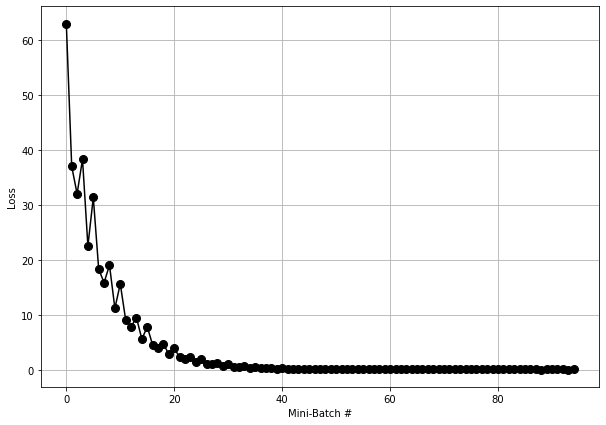

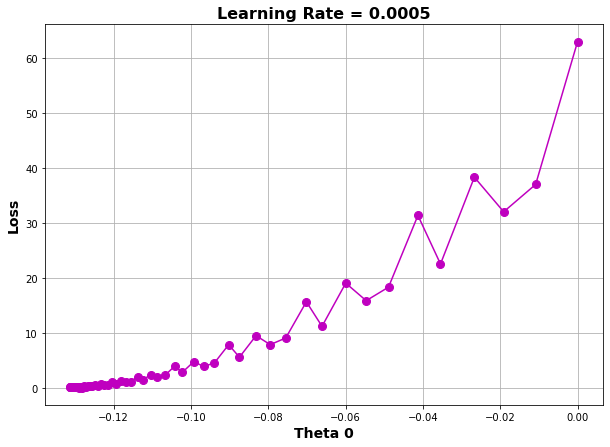

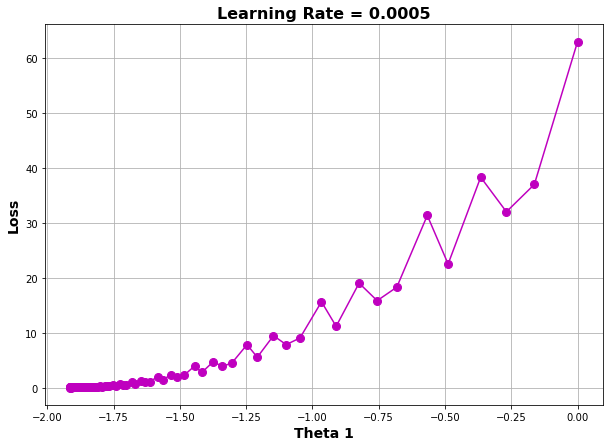

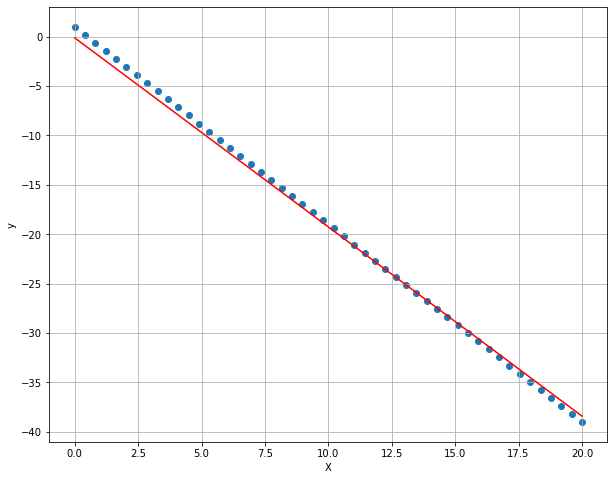

##### The following results uses batch size=20, alpha = 0.0005 and max. iterations = 300.

****************** Epoch 0 ********************

Cost = 126.24663174567475

Gradient Vector:
[[ 17.2116263 ]
 [234.92496791]]

Gradient Vector Norm:
235.5546234500846

theta_0_new : -0.009846938775510204
theta_1_new : -0.13470991253644315

****************** Epoch 1 ********************

Cost = 95.2117173776487

Gradient Vector:
[[ 14.90431582]
 [203.99105181]]

Gradient Vector Norm:
204.53480840347603

theta_0_new : -0.026985858149656733
theta_1_new : -0.369149480457521

****************** Epoch 2 ********************

Cost = 71.8119173096046

Gradient Vector:
[[ 12.90081071]
 [177.13009011]]

Gradient Vector Norm:
177.5992672864237

theta_0_new : -0.041830281557401115
theta_1_new : -0.5727240764439553

****************** Epoch 3 ********************

Cost = 54.168934578029884

Gradient Vector:
[[ 11.16111006]
 [153.80581204]]

Gradient Vector Norm:
154.21024024297918

theta_0_new : -0.05468232631950523
theta_1_new : -0.7494975760087796

****************** Epoch 4 ********************

r2_score 0.9975575226128095


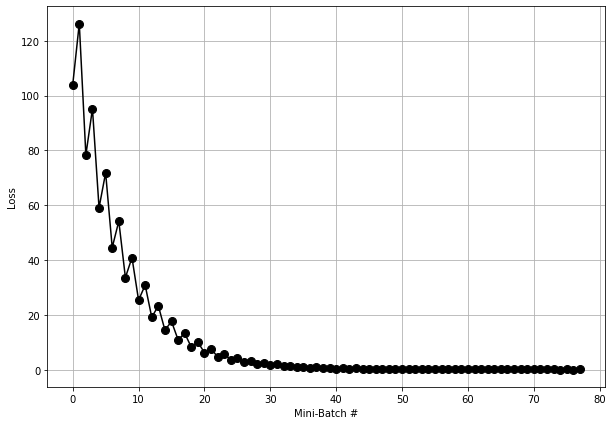

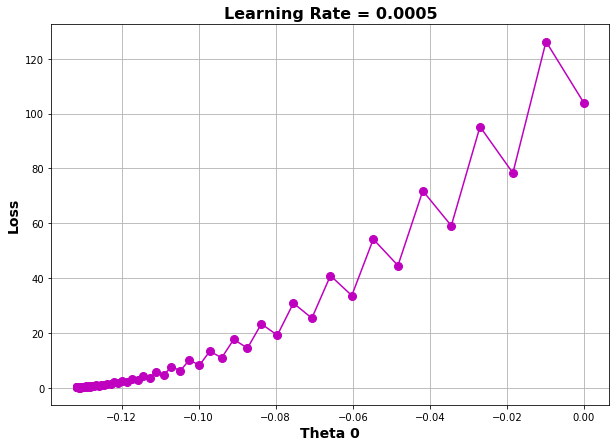

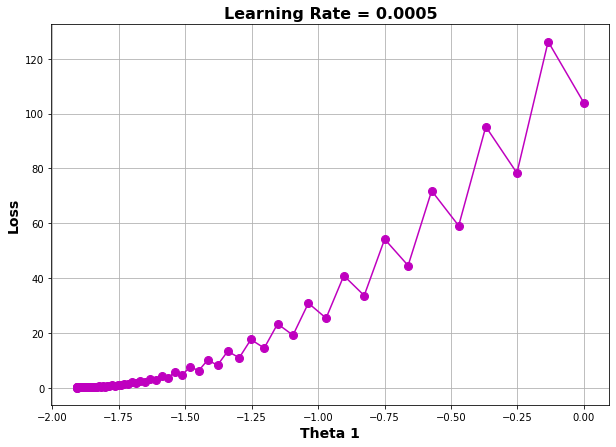

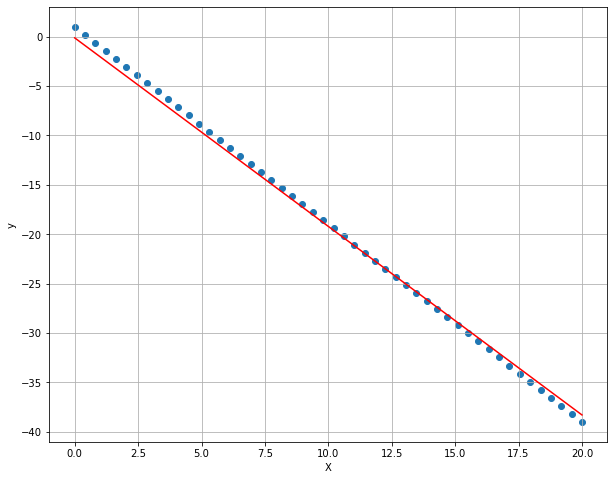